# p05: Repetition of p04 via FFT

In [1]:
%config InlineBackend.figure_format='svg'
#  For complex v, delete "real" commands.
from numpy import pi,inf,linspace,maximum,abs,zeros,arange,real,sin,cos,exp
from numpy.fft import fft,ifft
from numpy.linalg import norm
from matplotlib.pyplot import figure,subplot,plot,axis,title,text

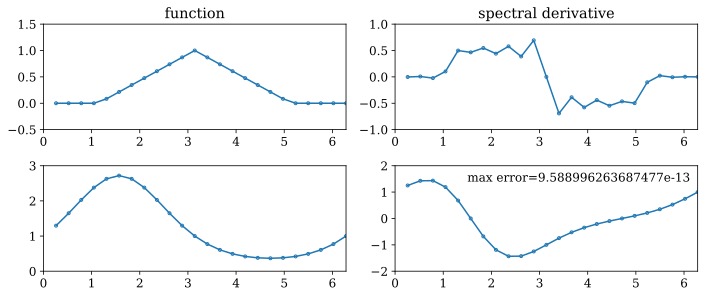

In [2]:
# Set up grid and differentiation matrix:
N = 24; h = 2*pi/N; x = h*arange(1,N+1);

# wave numbers
ik = 1j*zeros(N)
ik[0:N//2+1] = 1j*arange(0,N//2+1)
ik[N//2+1:]  = 1j*arange(-N//2+1,0,1)

# Differentiation of a hat function:
v = maximum(0.0,1.0-abs(x-pi)/2.0)
v_hat = fft(v)
w_hat = ik * v_hat; w_hat[N//2] = 0.0
w = real(ifft(w_hat))

figure(figsize=(10,6))

subplot(3,2,1)
plot(x,v,'.-')
axis([0, 2*pi, -.5, 1.5])
title('function')
subplot(3,2,2)
plot(x,w,'.-')
axis([0, 2*pi, -1, 1])
title('spectral derivative')

# Differentiation of exp(sin(x)):
v = exp(sin(x)); vprime = cos(x)*v;
v_hat = fft(v)
w_hat = ik * v_hat; w_hat[N//2] = 0.0
w = real(ifft(w_hat))

subplot(3,2,3)
plot(x,v,'.-')
axis([0, 2*pi, 0, 3])
subplot(3,2,4)
plot(x,w,'.-')
axis([0, 2*pi, -2, 2])
error = norm(w-vprime,inf)
text(1.5,1.4,"max error="+str(error));